## Data Loading

In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\DELL\OneDrive\Desktop\prProj\airline\airline.csv"
data = pd.read_csv(file_path)

# Display the first few rows and dataset info
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   41396 non-null  object 
 1   link                           41396 non-null  object 
 2   title                          41396 non-null  object 
 3   author                         41396 non-null  object 
 4   author_country                 39805 non-null  object 
 5   date                           41396 non-null  object 
 6   content                        41396 non-null  object 
 7   aircraft                       1278 non-null   object 
 8   type_traveller                 2378 non-null   object 
 9   cabin_flown                    38520 non-null  object 
 10  route                          2341 non-null   object 
 11  overall_rating                 36861 non-null  float64
 12  seat_comfort_rating            33706 non-null 

## Missing values

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values:
# 1. For numerical columns: Use the column mean.
# 2. For categorical columns: Use the column mode.
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

# Verify no missing values remain
print(data.isnull().sum())


airline_name                         0
link                                 0
title                                0
author                               0
author_country                    1591
date                                 0
content                              0
aircraft                         40118
type_traveller                   39018
cabin_flown                       2876
route                            39055
overall_rating                    4535
seat_comfort_rating               7690
cabin_staff_rating                7688
food_beverages_rating             8132
inflight_entertainment_rating    10282
ground_service_rating            39193
wifi_connectivity_rating         40831
value_money_rating                1673
recommended                          0
dtype: int64
airline_name                     0
link                             0
title                            0
author                           0
author_country                   0
date                            

## Encode Categorical Features

In [4]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the encoded data
print(data_encoded.head())


   overall_rating  seat_comfort_rating  cabin_staff_rating  \
0             7.0                  4.0                 4.0   
1            10.0                  4.0                 5.0   
2             9.0                  5.0                 5.0   
3             8.0                  4.0                 4.0   
4             4.0                  4.0                 2.0   

   food_beverages_rating  inflight_entertainment_rating  \
0                    4.0                            0.0   
1                    4.0                            1.0   
2                    4.0                            0.0   
3                    3.0                            1.0   
4                    1.0                            2.0   

   ground_service_rating  wifi_connectivity_rating  value_money_rating  \
0               2.736723                  2.249558                 4.0   
1               2.736723                  2.249558                 5.0   
2               2.736723                  2.249558

## CO Relation Matrix

In [ ]:
target = 'recommended'  # Replace with your target variable name
correlations = {}

for col in data_encoded.columns:
    if col != target:  # Skip the target variable itself
        correlations[col] = data_encoded[col].corr(data_encoded[target])

# Convert correlations to a DataFrame and sort by absolute correlation
correlation_with_target = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
correlation_with_target = correlation_with_target.abs().sort_values(by='Correlation', ascending=False)

# Select features above a certain threshold
threshold = 0.2  # Adjust based on your data = correlation_with_target[correlation_with_target['Correlation'] > threshold].index

# Print the selected features
print("Selected features based on correlation with target:")
print(selected_features)


Selected features based on correlation with target:
Index(['overall_rating', 'value_money_rating', 'cabin_staff_rating',
       'seat_comfort_rating', 'food_beverages_rating',
       'inflight_entertainment_rating'],
      dtype='object')


## Subset Data with Selected Features

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Subset the dataset with selected features and the target variable
selected_features = ['overall_rating', 'value_money_rating', 'cabin_staff_rating',
                     'seat_comfort_rating', 'food_beverages_rating', 
                     'inflight_entertainment_rating']
target = 'recommended'  # Target variable

# Create a new dataset with selected features
data_selected = data_encoded[selected_features + [target]]

# Display the subsetted data
print(data_selected.head())


   overall_rating  value_money_rating  cabin_staff_rating  \
0             7.0                 4.0                 4.0   
1            10.0                 5.0                 5.0   
2             9.0                 5.0                 5.0   
3             8.0                 4.0                 4.0   
4             4.0                 2.0                 2.0   

   seat_comfort_rating  food_beverages_rating  inflight_entertainment_rating  \
0                  4.0                    4.0                            0.0   
1                  4.0                    4.0                            1.0   
2                  5.0                    4.0                            0.0   
3                  4.0                    3.0                            1.0   
4                  4.0                    1.0                            2.0   

   recommended  
0            1  
1            1  
2            1  
3            1  
4            0  


## Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

y = data_encoded['recommended']
X_train, X_test, y_train, y_test = train_test_split(data_selected, y, test_size=0.2, random_state=42)

# Display shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (33116, 7)
Testing Features Shape: (8280, 7)


## Modeling

### Train a Bayesian Network

In [9]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator


In [10]:
# Define the Bayesian Network structure
model = BayesianNetwork([
    ('overall_rating', 'recommended'),
    ('value_money_rating', 'recommended'),
    ('cabin_staff_rating', 'recommended'),
    ('seat_comfort_rating', 'recommended'),
    ('food_beverages_rating', 'recommended'),
    ('inflight_entertainment_rating', 'recommended'),
])


### Train the Bayesian Network

In [11]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Train the Bayesian Network
model.fit(X_train, estimator=MaximumLikelihoodEstimator)

# Display the learned Conditional Probability Distributions (CPDs)
print("Learned CPDs:")
for cpd in model.get_cpds():
    print(f"CPD of {cpd.variable}:\n{cpd}\n")


Learned CPDs:
CPD of overall_rating:
+-----------------------------------+-----------+
| overall_rating(1.0)               | 0.131296  |
+-----------------------------------+-----------+
| overall_rating(2.0)               | 0.0728047 |
+-----------------------------------+-----------+
| overall_rating(3.0)               | 0.0564682 |
+-----------------------------------+-----------+
| overall_rating(4.0)               | 0.0431211 |
+-----------------------------------+-----------+
| overall_rating(5.0)               | 0.0609071 |
+-----------------------------------+-----------+
| overall_rating(6.0)               | 0.0436345 |
+-----------------------------------+-----------+
| overall_rating(6.039526871218904) | 0.110098  |
+-----------------------------------+-----------+
| overall_rating(7.0)               | 0.0792366 |
+-----------------------------------+-----------+
| overall_rating(8.0)               | 0.129061  |
+-----------------------------------+-----------+
| overall_rat

In [ ]:
# Perform inference on the entire test dataset
from tqdm import tqdm  # For progress tracking

# Initialize predictions list
predictions = []

# Iterate over the test dataset
for _, row in tqdm(X_test.iterrows(), total=X_test.shape[0], desc="Inference Progress"):
    evidence = row.to_dict()
    evidence.pop('recommended', None)  # Remove target from evidence
    result = inference.map_query(variables=['recommended'], evidence=evidence)
    predictions.append(result['recommended'])

# Compare predictions with true values
y_test = y_test.reset_index(drop=True)  # Ensure indices match
predictions = pd.Series(predictions, name='Predicted')
y_test = pd.Series(y_test, name='Actual')

# Evaluate accuracy
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
accuracy = (comparison['Actual'] == comparison['Predicted']).mean()
print(f"\nAccuracy: {accuracy:.2%}")

# Display a sample of the comparison DataFrame
print("\nSample Predictions vs Actual Values:")
print(comparison.sample(5))


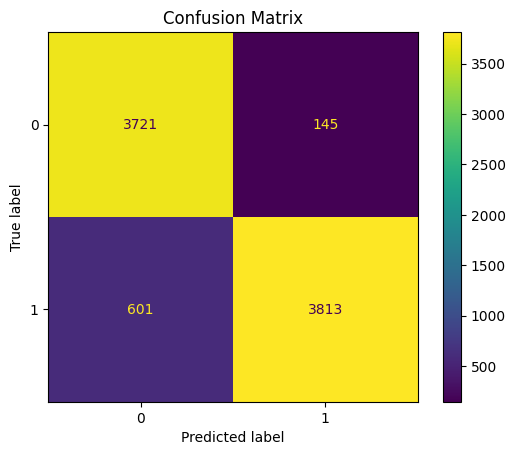

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


In [19]:
# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print test accuracy
print(f"Test Accuracy: {accuracy:.2%}")


Test Accuracy: 90.99%
